In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

In [ ]:
#fetching our dataframe

start='2013-01-01'
end='2023-10-31'
df=yfin.download('INTP.JK',start,end)
df.head(30)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,21900.0,22600.0,21850.0,21900.0,14190.922852,3921000
2013-01-03,21950.0,22300.0,21700.0,21950.0,14223.322266,4714500
2013-01-04,22050.0,22200.0,21750.0,22050.0,14288.122070,4995000
2013-01-07,21850.0,22100.0,21800.0,21850.0,14158.522461,2262500
2013-01-08,22100.0,22250.0,21800.0,22100.0,14320.518555,3296500
2013-01-09,21900.0,22150.0,21750.0,21900.0,14190.922852,4266000
2013-01-10,21300.0,21900.0,21250.0,21300.0,13802.128906,3564500
2013-01-11,21400.0,21600.0,21300.0,21400.0,13866.927734,1987500
2013-01-14,21600.0,21800.0,21500.0,21600.0,13996.524414,1543000


In [ ]:
#resetting index so we can drop it later since we don't need 'Date' column.

df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,21900.0,22600.0,21850.0,21900.0,14190.922852,3921000
1,2013-01-03,21950.0,22300.0,21700.0,21950.0,14223.322266,4714500
2,2013-01-04,22050.0,22200.0,21750.0,22050.0,14288.122070,4995000
3,2013-01-07,21850.0,22100.0,21800.0,21850.0,14158.522461,2262500
4,2013-01-08,22100.0,22250.0,21800.0,22100.0,14320.518555,3296500


In [ ]:
#Drop unnecessary features.

df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,21900.0,22600.0,21850.0,21900.0,3921000
1,21950.0,22300.0,21700.0,21950.0,4714500
2,22050.0,22200.0,21750.0,22050.0,4995000
3,21850.0,22100.0,21800.0,21850.0,2262500
4,22100.0,22250.0,21800.0,22100.0,3296500


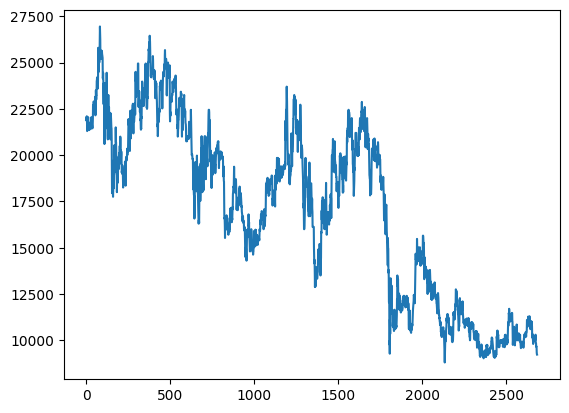

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2678    10316.75
2679    10312.75
2680    10304.25
2681    10293.75
2682    10287.00
Name: Close, Length: 2683, dtype: float64

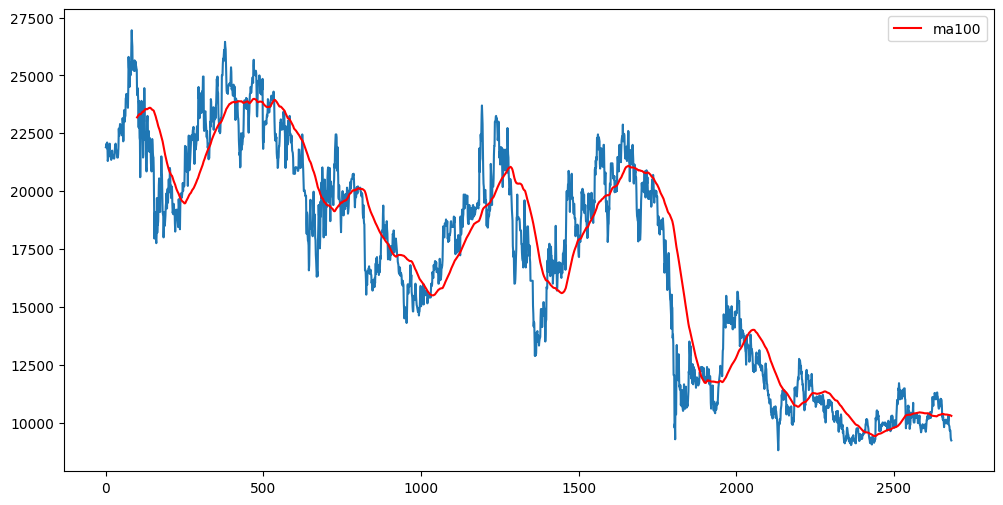

In [ ]:
#plotting MA100

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',label='ma100')
plt.legend()
plt.show()

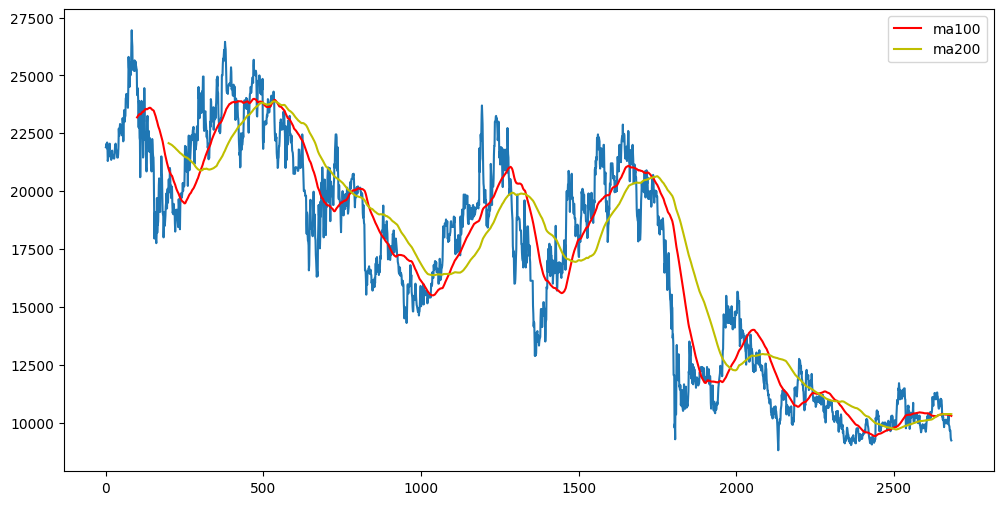

In [ ]:
#plotting MA100 and MA200 together

ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',label='ma100')
plt.plot(ma200,'y',label='ma200')
plt.legend()
plt.show()

In [ ]:
#splitting data into training/test
train=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
test=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [ ]:
#scale our training data

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=scaler.fit_transform(train)

In [ ]:
#separating x_train and y_train

x_train = []
y_train = []
for i in range(100, train.shape[0]-9):
    x_train.append(train[i-100:i])
    y_train.append(train[i:i+10,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Appending test data to past 100 data, and scale it

past100=pd.DataFrame(df.Close[0:int(len(df)*0.7)]).tail(100)
final_df=past100.append(test,ignore_index=True)
input_data=scaler.transform(final_df)
input_data

<ipython-input-12-3a18aecfb25d>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past100.append(test,ignore_index=True)


array([[ 0.42432815],
       [ 0.4115983 ],
       [ 0.39745403],
       [ 0.36492221],
       [ 0.40311174],
       [ 0.42574257],
       [ 0.45120226],
       [ 0.45544554],
       [ 0.45403112],
       [ 0.41301273],
       [ 0.3748232 ],
       [ 0.36350778],
       [ 0.34229137],
       [ 0.33804809],
       [ 0.31966054],
       [ 0.30127298],
       [ 0.27015559],
       [ 0.35360679],
       [ 0.32390382],
       [ 0.32107496],
       [ 0.24752475],
       [ 0.25601132],
       [ 0.23338048],
       [ 0.15700141],
       [ 0.15700141],
       [ 0.15700141],
       [ 0.02828854],
       [ 0.03818953],
       [ 0.        ],
       [ 0.10466761],
       [ 0.06082037],
       [ 0.06082037],
       [ 0.17680339],
       [ 0.23055163],
       [ 0.17821782],
       [ 0.1824611 ],
       [ 0.16407355],
       [ 0.14427157],
       [ 0.14992928],
       [ 0.20792079],
       [ 0.17680339],
       [ 0.12871287],
       [ 0.13154173],
       [ 0.12164074],
       [ 0.13295615],
       [ 0

In [ ]:
#Separate x_test and y_test

x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]-9):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i:i+10,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
!pip install optuna
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import optuna
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras.backend as K
from keras.callbacks import Callback

In [ ]:
# Instantiate Custom Loss
def custom_loss(y_test, y_predicted):
    # Assuming y_true and y_pred are tensors with arbitrary dimensions

    # Flatten the tensors to 1D arrays
    y_true_flat = K.flatten(y_test)
    y_pred_flat = K.flatten(y_predicted)

    # Assign higher weight to more recent data
    weights = K.arange(1, K.shape(y_true_flat)[0] + 1, dtype='float32')
    weights = K.reverse(weights, axes=0)
    weights /= K.sum(weights)

    # Calculate mean squared error with weighted samples
    loss = K.mean(weights * K.square(y_true_flat - y_pred_flat), axis=-1)

    return loss

# Instantiate the custom callback
class CustomEarlyStopping(EarlyStopping):
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0 and self.verbose > 0:
            print(f"Epoch {self.stopped_epoch + 1}: Early stopping")

        if self.restore_best_weights and self.best_weights is not None:
            if self.verbose > 0:
                print("Restoring model weights from the end of the best epoch: {self.best_epoch + 1}.")
            self.model.set_weights(self.best_weights)
custom_early_stopping = CustomEarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Create Study
def objective(trial):
    model = Sequential()

    # First layer
    model.add(LSTM(units=trial.suggest_int('units1', 20, 100), activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(trial.suggest_float('dropout1', 0.0, 0.5)))

    # Second layer
    model.add(LSTM(units=trial.suggest_int('units2', 50, 200), activation='tanh'))
    model.add(Dropout(trial.suggest_float('dropout2', 0.0, 0.5)))

    # Third layer
    #model.add(LSTM(units=trial.suggest_int('units3', 150, 300), activation='tanh'))
    #model.add(Dropout(trial.suggest_float('dropout3', 0.0, 0.5)))

    # Final layer
    model.add(Dense(units=10))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=trial.suggest_float('learning_rate', 1e-4, 1e-2)),
                  loss=custom_loss)

    # Train the model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80, callbacks=[custom_early_stopping])

    # Get the validation loss of the last epoch
    val_loss = history.history['val_loss'][-1]

    return val_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and corresponding validation loss
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Validation Loss: {}'.format(trial.value))
print('Best Hyperparameters: {}'.format(trial.params))

[I 2023-12-19 16:08:17,811] A new study created in memory with name: no-name-3548e2dd-182e-4887-a4a3-a3c9e5f6bc15


Epoch 1/80
56/56 [==============================] - 14s 93ms/step - loss: 1.9556e-04 - val_loss: 8.1417e-06
Epoch 2/80
56/56 [==============================] - 1s 21ms/step - loss: 4.5477e-05 - val_loss: 4.9865e-06
Epoch 3/80
56/56 [==============================] - 1s 21ms/step - loss: 2.9254e-05 - val_loss: 7.1297e-06
Epoch 4/80
56/56 [==============================] - 2s 34ms/step - loss: 2.4498e-05 - val_loss: 5.5270e-06
Epoch 5/80
56/56 [==============================] - 2s 33ms/step - loss: 2.8959e-05 - val_loss: 5.3440e-06
Epoch 6/80
56/56 [==============================] - 1s 20ms/step - loss: 2.1973e-05 - val_loss: 3.5707e-06
Epoch 7/80
56/56 [==============================] - 1s 20ms/step - loss: 1.9893e-05 - val_loss: 7.1830e-06
Epoch 8/80
56/56 [==============================] - 1s 22ms/step - loss: 1.9977e-05 - val_loss: 6.2134e-06
Epoch 9/80
56/56 [==============================] - 1s 23ms/step - loss: 1.8212e-05 - val_loss: 4.5368e-06
Epoch 10/80
56/56 [=================

[I 2023-12-19 16:09:40,434] Trial 0 finished with value: 4.81860342915752e-06 and parameters: {'units1': 26, 'dropout1': 0.27955093669416425, 'units2': 190, 'dropout2': 0.4920754740407609, 'learning_rate': 0.009112267482688082}. Best is trial 0 with value: 4.81860342915752e-06.


Epoch 1/80
56/56 [==============================] - 6s 31ms/step - loss: 1.4002e-04 - val_loss: 1.4375e-05
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 4.9979e-05 - val_loss: 7.7399e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.9456e-05 - val_loss: 9.9291e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 3.1069e-05 - val_loss: 4.9034e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1910e-05 - val_loss: 6.7364e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9845e-05 - val_loss: 7.4659e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9407e-05 - val_loss: 3.3884e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2642e-05 - val_loss: 4.2862e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6993e-05 - val_loss: 3.6882e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:11:05,769] Trial 1 finished with value: 1.3954628229839727e-05 and parameters: {'units1': 64, 'dropout1': 0.227498137463453, 'units2': 51, 'dropout2': 0.3712161308081046, 'learning_rate': 0.006621243102251094}. Best is trial 0 with value: 4.81860342915752e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 2.3155e-04 - val_loss: 3.3890e-05
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 3.0352e-05 - val_loss: 1.5507e-05
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 2.4698e-05 - val_loss: 1.1049e-05
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 2.3677e-05 - val_loss: 6.6279e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4007e-05 - val_loss: 6.8374e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3245e-05 - val_loss: 7.1812e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1798e-05 - val_loss: 6.6907e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4253e-05 - val_loss: 6.6540e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2550e-05 - val_loss: 7.0481e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:12:31,307] Trial 2 finished with value: 3.5515749914338812e-06 and parameters: {'units1': 84, 'dropout1': 0.15667277357040166, 'units2': 159, 'dropout2': 0.07321299789501529, 'learning_rate': 0.0003509010556593972}. Best is trial 2 with value: 3.5515749914338812e-06.


Epoch 1/80
56/56 [==============================] - 5s 26ms/step - loss: 1.1583e-04 - val_loss: 8.6205e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.6282e-05 - val_loss: 4.1965e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4752e-05 - val_loss: 4.9337e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3438e-05 - val_loss: 3.7718e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1671e-05 - val_loss: 3.6808e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9447e-05 - val_loss: 7.6628e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0112e-05 - val_loss: 3.5241e-06
Epoch 8/80
56/56 [==============================] - 1s 16ms/step - loss: 2.3270e-05 - val_loss: 5.5787e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6220e-05 - val_loss: 4.8712e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:13:34,260] Trial 3 finished with value: 4.582009296427714e-06 and parameters: {'units1': 24, 'dropout1': 0.21281941095013018, 'units2': 80, 'dropout2': 0.29006511447844335, 'learning_rate': 0.007244094117127278}. Best is trial 2 with value: 3.5515749914338812e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 1.1242e-04 - val_loss: 1.6514e-05
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.1205e-05 - val_loss: 6.4677e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4735e-05 - val_loss: 4.2834e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3140e-05 - val_loss: 6.5274e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0010e-05 - val_loss: 3.6860e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9498e-05 - val_loss: 3.0362e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0601e-05 - val_loss: 4.2581e-06
Epoch 8/80
56/56 [==============================] - 1s 15ms/step - loss: 1.9202e-05 - val_loss: 4.7424e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7372e-05 - val_loss: 2.8100e-05
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:14:59,416] Trial 4 finished with value: 5.7484749049763195e-06 and parameters: {'units1': 69, 'dropout1': 0.36607466472919953, 'units2': 120, 'dropout2': 0.41425818989192115, 'learning_rate': 0.008362871327542069}. Best is trial 2 with value: 3.5515749914338812e-06.


Epoch 1/80
56/56 [==============================] - 6s 26ms/step - loss: 1.1250e-04 - val_loss: 7.8354e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.2815e-05 - val_loss: 4.9854e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.6957e-05 - val_loss: 3.9774e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3724e-05 - val_loss: 4.1852e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1876e-05 - val_loss: 6.1622e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4937e-05 - val_loss: 5.6542e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4522e-05 - val_loss: 5.1252e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9123e-05 - val_loss: 4.8392e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8183e-05 - val_loss: 3.5115e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:16:03,386] Trial 5 finished with value: 2.6869861358136404e-06 and parameters: {'units1': 23, 'dropout1': 0.44500620571806493, 'units2': 100, 'dropout2': 0.12411652072085588, 'learning_rate': 0.00381044827780101}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 7.9961e-05 - val_loss: 4.2611e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.6337e-05 - val_loss: 5.8094e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1996e-05 - val_loss: 5.0571e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1715e-05 - val_loss: 4.6802e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9640e-05 - val_loss: 3.7355e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7751e-05 - val_loss: 5.5675e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9816e-05 - val_loss: 4.7895e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5579e-05 - val_loss: 5.2042e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6117e-05 - val_loss: 3.8765e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:17:07,946] Trial 6 finished with value: 4.071533567184815e-06 and parameters: {'units1': 65, 'dropout1': 0.1835112558795322, 'units2': 139, 'dropout2': 0.3247686571544885, 'learning_rate': 0.007459826727669046}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 27ms/step - loss: 1.4523e-04 - val_loss: 4.5945e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.6000e-05 - val_loss: 5.5949e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 3.4112e-05 - val_loss: 5.4190e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 3.0895e-05 - val_loss: 3.8421e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6928e-05 - val_loss: 3.7507e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.5766e-05 - val_loss: 5.7766e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2794e-05 - val_loss: 3.7615e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1829e-05 - val_loss: 3.2778e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4050e-05 - val_loss: 4.1103e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:18:33,901] Trial 7 finished with value: 3.4617187338881195e-06 and parameters: {'units1': 93, 'dropout1': 0.22516204159913594, 'units2': 56, 'dropout2': 0.16723606458710977, 'learning_rate': 0.00209132050679796}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 49ms/step - loss: 1.3325e-04 - val_loss: 2.3400e-05
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.8264e-05 - val_loss: 5.6105e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.9566e-05 - val_loss: 9.2515e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.8891e-05 - val_loss: 4.8495e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6027e-05 - val_loss: 5.5428e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1632e-05 - val_loss: 5.3995e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1597e-05 - val_loss: 5.6182e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0146e-05 - val_loss: 4.6860e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0353e-05 - val_loss: 4.0195e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:19:42,446] Trial 8 finished with value: 4.484176770347403e-06 and parameters: {'units1': 27, 'dropout1': 0.16021516967226834, 'units2': 195, 'dropout2': 0.20896550354760784, 'learning_rate': 0.001673391874776478}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 1.3687e-04 - val_loss: 5.5751e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.5117e-05 - val_loss: 6.0041e-06
Epoch 3/80
56/56 [==============================] - 1s 16ms/step - loss: 2.6724e-05 - val_loss: 4.8807e-06
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 2.1955e-05 - val_loss: 4.2576e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0002e-05 - val_loss: 5.5988e-06
Epoch 6/80
56/56 [==============================] - 1s 15ms/step - loss: 2.0105e-05 - val_loss: 3.9071e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1149e-05 - val_loss: 3.4737e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6322e-05 - val_loss: 3.7316e-06
Epoch 9/80
56/56 [==============================] - 1s 15ms/step - loss: 1.7271e-05 - val_loss: 6.3662e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:20:49,987] Trial 9 finished with value: 4.04626598538016e-06 and parameters: {'units1': 36, 'dropout1': 0.2836525458863467, 'units2': 185, 'dropout2': 0.16361404316456596, 'learning_rate': 0.005148395469493992}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 8.9413e-05 - val_loss: 9.2836e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.7115e-05 - val_loss: 1.4008e-05
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3095e-05 - val_loss: 4.5160e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1420e-05 - val_loss: 6.9149e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8157e-05 - val_loss: 4.0840e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7208e-05 - val_loss: 4.0721e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8181e-05 - val_loss: 4.6300e-06
Epoch 8/80
56/56 [==============================] - 1s 16ms/step - loss: 1.6648e-05 - val_loss: 4.0722e-06
Epoch 9/80
56/56 [==============================] - 1s 16ms/step - loss: 1.6039e-05 - val_loss: 3.9113e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:21:53,984] Trial 10 finished with value: 1.3054026567260735e-05 and parameters: {'units1': 41, 'dropout1': 0.4835272059023293, 'units2': 103, 'dropout2': 0.007626837785617874, 'learning_rate': 0.00383490903121992}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 31ms/step - loss: 1.0036e-04 - val_loss: 5.3299e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.1234e-05 - val_loss: 4.8567e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.8747e-05 - val_loss: 4.2861e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 3.4078e-05 - val_loss: 3.9193e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0720e-05 - val_loss: 3.7566e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8618e-05 - val_loss: 5.1743e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0776e-05 - val_loss: 3.8046e-06
Epoch 8/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8815e-05 - val_loss: 3.5295e-06
Epoch 9/80
56/56 [==============================] - 1s 16ms/step - loss: 1.7003e-05 - val_loss: 4.4462e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:22:57,575] Trial 11 finished with value: 4.197043381282128e-06 and parameters: {'units1': 100, 'dropout1': 0.02593110283073019, 'units2': 54, 'dropout2': 0.1411187751740717, 'learning_rate': 0.003364670312222911}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 1.1602e-04 - val_loss: 4.5628e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.6369e-05 - val_loss: 9.6935e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4188e-05 - val_loss: 6.9454e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.7186e-05 - val_loss: 5.2293e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2080e-05 - val_loss: 4.4529e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2139e-05 - val_loss: 4.1729e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1715e-05 - val_loss: 4.7374e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2601e-05 - val_loss: 4.0565e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.8542e-05 - val_loss: 3.9788e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:24:03,944] Trial 12 finished with value: 3.642382807811373e-06 and parameters: {'units1': 47, 'dropout1': 0.4800289974347142, 'units2': 87, 'dropout2': 0.0948812672372325, 'learning_rate': 0.0024776897396186592}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 9.7804e-05 - val_loss: 3.8538e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.0691e-05 - val_loss: 8.2856e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.5458e-05 - val_loss: 4.9868e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.9188e-05 - val_loss: 4.7393e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0379e-05 - val_loss: 6.4339e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1199e-05 - val_loss: 3.6119e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2059e-05 - val_loss: 4.5122e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8937e-05 - val_loss: 4.4153e-06
Epoch 9/80
56/56 [==============================] - 1s 16ms/step - loss: 1.7301e-05 - val_loss: 4.4155e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:25:08,738] Trial 13 finished with value: 2.8612182632059557e-06 and parameters: {'units1': 83, 'dropout1': 0.3672361581360176, 'units2': 76, 'dropout2': 0.2286343145574376, 'learning_rate': 0.004988028399452492}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 1.2573e-04 - val_loss: 2.6578e-05
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.3135e-05 - val_loss: 1.6994e-05
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 4.3941e-05 - val_loss: 1.0643e-05
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4301e-05 - val_loss: 5.7942e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3949e-05 - val_loss: 4.2099e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0103e-05 - val_loss: 4.5039e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9713e-05 - val_loss: 3.5301e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0730e-05 - val_loss: 6.0374e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6856e-05 - val_loss: 4.1885e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:26:12,002] Trial 14 finished with value: 4.262160928192316e-06 and parameters: {'units1': 78, 'dropout1': 0.3928458049049276, 'units2': 84, 'dropout2': 0.24644769795979476, 'learning_rate': 0.005519130056831577}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 7.8217e-05 - val_loss: 4.9719e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8366e-05 - val_loss: 7.2120e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.5526e-05 - val_loss: 5.5392e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6701e-05 - val_loss: 4.5702e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7095e-05 - val_loss: 4.5838e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5621e-05 - val_loss: 4.4395e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5756e-05 - val_loss: 5.5684e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.4279e-05 - val_loss: 3.6203e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5472e-05 - val_loss: 3.5611e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:27:38,007] Trial 15 finished with value: 4.540243025985546e-06 and parameters: {'units1': 55, 'dropout1': 0.40403285178365667, 'units2': 112, 'dropout2': 0.011274899569870267, 'learning_rate': 0.00436970352059947}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 30ms/step - loss: 1.0010e-04 - val_loss: 4.4822e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.1011e-05 - val_loss: 3.7564e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4310e-05 - val_loss: 1.0562e-05
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2046e-05 - val_loss: 5.2789e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1551e-05 - val_loss: 3.3496e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0466e-05 - val_loss: 3.0942e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9904e-05 - val_loss: 6.9906e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7885e-05 - val_loss: 4.6048e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7620e-05 - val_loss: 3.6678e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:28:44,478] Trial 16 finished with value: 3.6875719615636626e-06 and parameters: {'units1': 81, 'dropout1': 0.3385891934208759, 'units2': 97, 'dropout2': 0.22977502287610727, 'learning_rate': 0.005342844288664096}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 33ms/step - loss: 9.2469e-05 - val_loss: 8.3592e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1617e-05 - val_loss: 1.6212e-05
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2017e-05 - val_loss: 5.2838e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9196e-05 - val_loss: 5.2682e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1327e-05 - val_loss: 3.3475e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7923e-05 - val_loss: 6.1725e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6331e-05 - val_loss: 3.2102e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8272e-05 - val_loss: 5.3964e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8241e-05 - val_loss: 3.7254e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:30:10,777] Trial 17 finished with value: 3.6417588944459567e-06 and parameters: {'units1': 56, 'dropout1': 0.4246587128085583, 'units2': 140, 'dropout2': 0.09316216661059547, 'learning_rate': 0.006315472404784859}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 33ms/step - loss: 1.1776e-04 - val_loss: 5.6454e-06
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 3.8679e-05 - val_loss: 4.4813e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 3.3052e-05 - val_loss: 6.0441e-06
Epoch 4/80
56/56 [==============================] - 1s 15ms/step - loss: 2.7767e-05 - val_loss: 7.9531e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 3.6970e-05 - val_loss: 4.2461e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2312e-05 - val_loss: 5.1743e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1430e-05 - val_loss: 4.6937e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2086e-05 - val_loss: 3.4491e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0203e-05 - val_loss: 5.7206e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:31:18,402] Trial 18 finished with value: 6.250508249650011e-06 and parameters: {'units1': 71, 'dropout1': 0.32887820753302577, 'units2': 71, 'dropout2': 0.28420475348244234, 'learning_rate': 0.003372327215711164}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 38ms/step - loss: 3.4686e-04 - val_loss: 3.0622e-05
Epoch 2/80
56/56 [==============================] - 1s 16ms/step - loss: 5.7170e-05 - val_loss: 1.4129e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 4.8363e-05 - val_loss: 9.0547e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 4.4564e-05 - val_loss: 6.9167e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 4.3095e-05 - val_loss: 8.6301e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 3.8952e-05 - val_loss: 1.2856e-05
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 3.9564e-05 - val_loss: 8.3208e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 3.7071e-05 - val_loss: 7.3802e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 3.4712e-05 - val_loss: 8.4253e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:32:24,166] Trial 19 finished with value: 3.349396820340189e-06 and parameters: {'units1': 90, 'dropout1': 0.44834864468329283, 'units2': 69, 'dropout2': 0.19631433181446084, 'learning_rate': 0.00042084234857363984}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 36ms/step - loss: 7.9664e-05 - val_loss: 4.7258e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.3594e-05 - val_loss: 1.5293e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4615e-05 - val_loss: 3.9602e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8166e-05 - val_loss: 3.8377e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7482e-05 - val_loss: 3.2593e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.6673e-05 - val_loss: 5.4247e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8785e-05 - val_loss: 3.9898e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.4763e-05 - val_loss: 3.9451e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5446e-05 - val_loss: 3.1642e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:33:49,403] Trial 20 finished with value: 6.9816164796066005e-06 and parameters: {'units1': 49, 'dropout1': 0.09707421580839071, 'units2': 133, 'dropout2': 0.12021902037488874, 'learning_rate': 0.00433699654886821}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 1.9816e-04 - val_loss: 4.7215e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 5.0351e-05 - val_loss: 5.3697e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 4.2955e-05 - val_loss: 4.8649e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 4.0586e-05 - val_loss: 4.8750e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 3.8284e-05 - val_loss: 5.5731e-06
Epoch 6/80
56/56 [==============================] - 1s 16ms/step - loss: 3.2515e-05 - val_loss: 5.8567e-06
Epoch 7/80
56/56 [==============================] - 1s 20ms/step - loss: 3.0565e-05 - val_loss: 5.0183e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 2.9281e-05 - val_loss: 7.6554e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 3.2533e-05 - val_loss: 3.9415e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:35:14,602] Trial 21 finished with value: 3.1203596790874144e-06 and parameters: {'units1': 90, 'dropout1': 0.4473549690371488, 'units2': 69, 'dropout2': 0.19486753676994942, 'learning_rate': 0.0007545106486225939}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 39ms/step - loss: 1.2905e-04 - val_loss: 1.0217e-05
Epoch 2/80
56/56 [==============================] - 1s 15ms/step - loss: 2.6751e-05 - val_loss: 5.2984e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3422e-05 - val_loss: 4.1988e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2898e-05 - val_loss: 6.4837e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3460e-05 - val_loss: 3.8532e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1994e-05 - val_loss: 4.2151e-06
Epoch 7/80
56/56 [==============================] - 1s 16ms/step - loss: 2.0450e-05 - val_loss: 7.1703e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 2.3464e-05 - val_loss: 4.5388e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0636e-05 - val_loss: 4.3355e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:36:21,982] Trial 22 finished with value: 3.0932681056583533e-06 and parameters: {'units1': 100, 'dropout1': 0.4443610239227607, 'units2': 99, 'dropout2': 0.05077259273366461, 'learning_rate': 0.001154456067909645}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 29ms/step - loss: 1.1770e-04 - val_loss: 1.1720e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3621e-05 - val_loss: 4.0392e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5072e-05 - val_loss: 4.5133e-06
Epoch 4/80
56/56 [==============================] - 1s 15ms/step - loss: 2.2043e-05 - val_loss: 4.0533e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2648e-05 - val_loss: 4.5587e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0410e-05 - val_loss: 3.9284e-06
Epoch 7/80
56/56 [==============================] - 1s 16ms/step - loss: 1.8290e-05 - val_loss: 4.7439e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9302e-05 - val_loss: 4.3360e-06
Epoch 9/80
56/56 [==============================] - 1s 16ms/step - loss: 1.8938e-05 - val_loss: 3.9077e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:37:47,189] Trial 23 finished with value: 4.0255149542645086e-06 and parameters: {'units1': 98, 'dropout1': 0.3642113078955452, 'units2': 102, 'dropout2': 0.05405013345426937, 'learning_rate': 0.0014037200881095746}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 9.5739e-05 - val_loss: 4.0646e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2065e-05 - val_loss: 4.1459e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9086e-05 - val_loss: 6.0111e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9884e-05 - val_loss: 5.0180e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1263e-05 - val_loss: 3.4377e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0659e-05 - val_loss: 3.5794e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0070e-05 - val_loss: 3.6486e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5656e-05 - val_loss: 3.7156e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6584e-05 - val_loss: 4.2758e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:38:51,639] Trial 24 finished with value: 3.1233016670739744e-06 and parameters: {'units1': 75, 'dropout1': 0.49523776234550854, 'units2': 117, 'dropout2': 0.03369552932118647, 'learning_rate': 0.003003732920080892}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 8.8352e-05 - val_loss: 4.6732e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.6218e-05 - val_loss: 3.6162e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3704e-05 - val_loss: 7.5709e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 3.5914e-05 - val_loss: 4.8633e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0033e-05 - val_loss: 4.1159e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8010e-05 - val_loss: 3.9888e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8465e-05 - val_loss: 6.1898e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8746e-05 - val_loss: 3.9118e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6809e-05 - val_loss: 4.5321e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:40:17,317] Trial 25 finished with value: 5.810519724036567e-06 and parameters: {'units1': 86, 'dropout1': 0.31023765697983796, 'units2': 95, 'dropout2': 0.12144666843191809, 'learning_rate': 0.004323444793193162}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 35ms/step - loss: 9.7349e-05 - val_loss: 2.3370e-05
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 2.2382e-05 - val_loss: 4.6318e-06
Epoch 3/80
56/56 [==============================] - 1s 19ms/step - loss: 2.1187e-05 - val_loss: 4.1606e-06
Epoch 4/80
56/56 [==============================] - 1s 16ms/step - loss: 1.7817e-05 - val_loss: 3.6914e-06
Epoch 5/80
56/56 [==============================] - 1s 16ms/step - loss: 1.8109e-05 - val_loss: 6.9109e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6379e-05 - val_loss: 4.4499e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5768e-05 - val_loss: 3.6352e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5741e-05 - val_loss: 4.7250e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7324e-05 - val_loss: 3.9587e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:41:42,524] Trial 26 finished with value: 2.884700506911031e-06 and parameters: {'units1': 95, 'dropout1': 0.4269166912402966, 'units2': 109, 'dropout2': 0.05756898880096039, 'learning_rate': 0.005997058635256517}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 8.4244e-05 - val_loss: 5.2407e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4827e-05 - val_loss: 3.6498e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.9338e-05 - val_loss: 3.5981e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.4639e-05 - val_loss: 4.6675e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8175e-05 - val_loss: 4.8104e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8840e-05 - val_loss: 5.3140e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7452e-05 - val_loss: 4.1770e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9274e-05 - val_loss: 3.7775e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6044e-05 - val_loss: 5.2092e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:42:44,625] Trial 27 finished with value: 5.084406438982114e-06 and parameters: {'units1': 31, 'dropout1': 0.382917375827322, 'units2': 154, 'dropout2': 0.16319328577595305, 'learning_rate': 0.0060803637084236315}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 29ms/step - loss: 8.2166e-05 - val_loss: 1.0323e-05
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.3331e-05 - val_loss: 5.1539e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2183e-05 - val_loss: 8.5329e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2267e-05 - val_loss: 4.9373e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0473e-05 - val_loss: 5.8108e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0043e-05 - val_loss: 4.1241e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7601e-05 - val_loss: 1.1067e-05
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9450e-05 - val_loss: 1.4501e-05
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6002e-05 - val_loss: 3.1719e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:44:12,608] Trial 28 finished with value: 6.926413789187791e-06 and parameters: {'units1': 75, 'dropout1': 0.41667641621382057, 'units2': 109, 'dropout2': 0.2963473246410679, 'learning_rate': 0.007552156651021861}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 35ms/step - loss: 1.2354e-04 - val_loss: 4.8020e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.1868e-05 - val_loss: 4.3543e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.8891e-05 - val_loss: 5.7654e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2815e-05 - val_loss: 1.3596e-05
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3255e-05 - val_loss: 5.5096e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9425e-05 - val_loss: 4.2538e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8867e-05 - val_loss: 3.5585e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6730e-05 - val_loss: 4.1387e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6812e-05 - val_loss: 8.5019e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:46:00,536] Trial 29 finished with value: 1.3422682968666777e-05 and parameters: {'units1': 94, 'dropout1': 0.2693052669726763, 'units2': 78, 'dropout2': 0.4582544794288127, 'learning_rate': 0.009214918896440159}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 8.6708e-05 - val_loss: 9.7859e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2596e-05 - val_loss: 1.1959e-05
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9388e-05 - val_loss: 5.0783e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1267e-05 - val_loss: 3.6848e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6737e-05 - val_loss: 3.9037e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7138e-05 - val_loss: 4.1828e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9078e-05 - val_loss: 4.0222e-06
Epoch 8/80
56/56 [==============================] - 1s 16ms/step - loss: 1.5152e-05 - val_loss: 1.1246e-05
Epoch 9/80
56/56 [==============================] - 1s 16ms/step - loss: 1.5022e-05 - val_loss: 4.2387e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:47:25,799] Trial 30 finished with value: 3.6947988064639503e-06 and parameters: {'units1': 42, 'dropout1': 0.29826653427782285, 'units2': 128, 'dropout2': 0.08795629104880173, 'learning_rate': 0.008345426365051279}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 7.3978e-05 - val_loss: 5.3004e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2029e-05 - val_loss: 4.0139e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1510e-05 - val_loss: 3.9492e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8282e-05 - val_loss: 4.3426e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7747e-05 - val_loss: 3.3659e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8656e-05 - val_loss: 4.8401e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6310e-05 - val_loss: 6.4413e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8025e-05 - val_loss: 6.8019e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4449e-05 - val_loss: 3.9484e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:48:31,173] Trial 31 finished with value: 3.3788553537306143e-06 and parameters: {'units1': 100, 'dropout1': 0.444850549550432, 'units2': 90, 'dropout2': 0.04236122187569982, 'learning_rate': 0.005578778684276108}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 7.5117e-05 - val_loss: 2.1436e-05
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2799e-05 - val_loss: 8.9093e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4572e-05 - val_loss: 5.8365e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7955e-05 - val_loss: 5.1094e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7061e-05 - val_loss: 4.4124e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5725e-05 - val_loss: 3.5131e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6780e-05 - val_loss: 3.9515e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6097e-05 - val_loss: 3.0786e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.4677e-05 - val_loss: 3.2536e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:49:57,186] Trial 32 finished with value: 3.0461599180853227e-06 and parameters: {'units1': 85, 'dropout1': 0.4566455326438215, 'units2': 108, 'dropout2': 0.06062375006014198, 'learning_rate': 0.006525042996058586}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 45ms/step - loss: 8.2561e-05 - val_loss: 1.5868e-05
Epoch 2/80
56/56 [==============================] - 1s 21ms/step - loss: 2.4566e-05 - val_loss: 5.1584e-06
Epoch 3/80
56/56 [==============================] - 1s 21ms/step - loss: 2.2245e-05 - val_loss: 6.9941e-06
Epoch 4/80
56/56 [==============================] - 1s 21ms/step - loss: 1.8351e-05 - val_loss: 9.8352e-06
Epoch 5/80
56/56 [==============================] - 1s 20ms/step - loss: 2.1842e-05 - val_loss: 3.3422e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7613e-05 - val_loss: 4.2253e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7030e-05 - val_loss: 4.4540e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8841e-05 - val_loss: 5.2775e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7235e-05 - val_loss: 7.3680e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:51:22,391] Trial 33 finished with value: 4.567928408505395e-05 and parameters: {'units1': 86, 'dropout1': 0.3487494214040079, 'units2': 112, 'dropout2': 0.11819883208486909, 'learning_rate': 0.006778528035835639}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 32ms/step - loss: 1.2179e-04 - val_loss: 4.9686e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2985e-05 - val_loss: 1.0528e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 3.0856e-05 - val_loss: 5.9338e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9034e-05 - val_loss: 3.8637e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9765e-05 - val_loss: 3.5296e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0143e-05 - val_loss: 3.0890e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8187e-05 - val_loss: 5.6663e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7497e-05 - val_loss: 3.3454e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5532e-05 - val_loss: 7.0682e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:52:28,451] Trial 34 finished with value: 4.3701929826056585e-06 and parameters: {'units1': 83, 'dropout1': 0.45876124278192637, 'units2': 126, 'dropout2': 0.07185584087367901, 'learning_rate': 0.006805281226164179}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 27ms/step - loss: 8.9090e-05 - val_loss: 4.0515e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2421e-05 - val_loss: 4.3176e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0993e-05 - val_loss: 4.0327e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9830e-05 - val_loss: 7.3248e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7997e-05 - val_loss: 3.5931e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8382e-05 - val_loss: 9.3785e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8424e-05 - val_loss: 2.0880e-05
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0226e-05 - val_loss: 8.9668e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5875e-05 - val_loss: 6.1201e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:53:28,649] Trial 35 finished with value: 3.380618409210001e-06 and parameters: {'units1': 20, 'dropout1': 0.4149371747882482, 'units2': 62, 'dropout2': 0.024158858302356444, 'learning_rate': 0.005983309373226044}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 1.3175e-04 - val_loss: 4.6226e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 3.7850e-05 - val_loss: 4.5461e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 3.3856e-05 - val_loss: 4.5733e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.8974e-05 - val_loss: 5.0213e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 2.5502e-05 - val_loss: 4.7844e-06
Epoch 6/80
56/56 [==============================] - 1s 16ms/step - loss: 2.5684e-05 - val_loss: 3.6833e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 2.2739e-05 - val_loss: 3.7147e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0263e-05 - val_loss: 3.9314e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8440e-05 - val_loss: 5.9221e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:54:53,862] Trial 36 finished with value: 3.593968813220272e-06 and parameters: {'units1': 60, 'dropout1': 0.3767138484383778, 'units2': 75, 'dropout2': 0.3422074027032437, 'learning_rate': 0.004183580944613833}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 9.4402e-05 - val_loss: 6.9005e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3516e-05 - val_loss: 1.1124e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.9677e-05 - val_loss: 4.3053e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7478e-05 - val_loss: 4.6423e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8118e-05 - val_loss: 4.2355e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5951e-05 - val_loss: 3.0212e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5748e-05 - val_loss: 5.1124e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5770e-05 - val_loss: 4.4060e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.6431e-05 - val_loss: 3.8028e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:56:19,828] Trial 37 finished with value: 8.474101377942134e-06 and parameters: {'units1': 69, 'dropout1': 0.46734639662434474, 'units2': 90, 'dropout2': 0.0679298871414796, 'learning_rate': 0.008137379523658434}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 38ms/step - loss: 1.7287e-04 - val_loss: 6.5551e-06
Epoch 2/80
56/56 [==============================] - 1s 16ms/step - loss: 3.6713e-05 - val_loss: 9.1491e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6708e-05 - val_loss: 3.8153e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5586e-05 - val_loss: 7.8051e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1167e-05 - val_loss: 5.5918e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1399e-05 - val_loss: 4.6175e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9745e-05 - val_loss: 5.0434e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8392e-05 - val_loss: 5.5423e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9152e-05 - val_loss: 4.9895e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:57:26,718] Trial 38 finished with value: 3.417143716433202e-06 and parameters: {'units1': 93, 'dropout1': 0.4958863239752743, 'units2': 146, 'dropout2': 0.3959622673069473, 'learning_rate': 0.009650311572549175}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 34ms/step - loss: 1.0343e-04 - val_loss: 4.9338e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.6936e-05 - val_loss: 3.7395e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3792e-05 - val_loss: 7.6417e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1966e-05 - val_loss: 5.9774e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8786e-05 - val_loss: 3.4757e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7956e-05 - val_loss: 3.2732e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7537e-05 - val_loss: 5.5804e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8134e-05 - val_loss: 4.1167e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9568e-05 - val_loss: 4.7165e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:58:31,916] Trial 39 finished with value: 5.348990725906333e-06 and parameters: {'units1': 79, 'dropout1': 0.24254335728596416, 'units2': 119, 'dropout2': 0.14252683022043436, 'learning_rate': 0.0048189356714169055}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 37ms/step - loss: 1.4323e-04 - val_loss: 6.2030e-06
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 3.0646e-05 - val_loss: 5.1485e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.9184e-05 - val_loss: 5.8065e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0737e-05 - val_loss: 4.4583e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0547e-05 - val_loss: 3.9488e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0553e-05 - val_loss: 3.9007e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7789e-05 - val_loss: 6.7172e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8646e-05 - val_loss: 3.9586e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2937e-05 - val_loss: 9.1510e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 16:59:38,932] Trial 40 finished with value: 3.0119931579974946e-06 and parameters: {'units1': 88, 'dropout1': 0.4192005516843427, 'units2': 165, 'dropout2': 0.22687419560166414, 'learning_rate': 0.0047866237065145294}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 33ms/step - loss: 1.3541e-04 - val_loss: 9.1733e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.1626e-05 - val_loss: 4.5522e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6422e-05 - val_loss: 5.8547e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1647e-05 - val_loss: 7.9759e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4672e-05 - val_loss: 5.8066e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2153e-05 - val_loss: 4.5645e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9468e-05 - val_loss: 7.7578e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8922e-05 - val_loss: 3.8737e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7618e-05 - val_loss: 4.3487e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:01:04,222] Trial 41 finished with value: 1.312139011133695e-05 and parameters: {'units1': 89, 'dropout1': 0.4327834117501921, 'units2': 180, 'dropout2': 0.27369319498338135, 'learning_rate': 0.004865322028793174}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 7.2973e-05 - val_loss: 4.1771e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 3.9526e-05 - val_loss: 1.0459e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2417e-05 - val_loss: 4.0285e-06
Epoch 4/80
56/56 [==============================] - 1s 15ms/step - loss: 1.8012e-05 - val_loss: 4.4898e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9257e-05 - val_loss: 3.4879e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6691e-05 - val_loss: 1.0499e-05
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9078e-05 - val_loss: 5.3129e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8904e-05 - val_loss: 3.9869e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7731e-05 - val_loss: 5.3921e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:02:29,404] Trial 42 finished with value: 5.450560820463579e-06 and parameters: {'units1': 95, 'dropout1': 0.3978993944743538, 'units2': 165, 'dropout2': 0.2198777708332325, 'learning_rate': 0.005879203822190918}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 28ms/step - loss: 8.8051e-05 - val_loss: 8.4090e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.7069e-05 - val_loss: 5.6009e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2304e-05 - val_loss: 1.9140e-05
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.7641e-05 - val_loss: 3.7097e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0305e-05 - val_loss: 4.0211e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8518e-05 - val_loss: 4.7716e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7734e-05 - val_loss: 3.3011e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7631e-05 - val_loss: 4.1155e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9542e-05 - val_loss: 3.5313e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:03:38,978] Trial 43 finished with value: 1.1264815839240327e-05 and parameters: {'units1': 86, 'dropout1': 0.47077659979670744, 'units2': 106, 'dropout2': 0.25497927252916863, 'learning_rate': 0.007271232083333111}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.0321e-04 - val_loss: 5.0632e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4889e-05 - val_loss: 5.2993e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5074e-05 - val_loss: 5.6731e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5693e-05 - val_loss: 4.6166e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0117e-05 - val_loss: 3.5521e-06
Epoch 6/80
56/56 [==============================] - 1s 15ms/step - loss: 2.0351e-05 - val_loss: 3.5465e-06
Epoch 7/80
56/56 [==============================] - 1s 18ms/step - loss: 1.8757e-05 - val_loss: 4.0891e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0649e-05 - val_loss: 4.4085e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7854e-05 - val_loss: 3.8935e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:05:04,223] Trial 44 finished with value: 3.268583895987831e-06 and parameters: {'units1': 64, 'dropout1': 0.3565347637238981, 'units2': 174, 'dropout2': 0.18263564208813485, 'learning_rate': 0.0037562141901663643}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 29ms/step - loss: 1.0572e-04 - val_loss: 1.7669e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3984e-05 - val_loss: 3.5466e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6998e-05 - val_loss: 4.0886e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.0835e-05 - val_loss: 4.5707e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0771e-05 - val_loss: 3.3774e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5314e-05 - val_loss: 5.3227e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7289e-05 - val_loss: 7.8387e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8376e-05 - val_loss: 3.1357e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6405e-05 - val_loss: 3.3901e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:06:14,211] Trial 45 finished with value: 1.2997091289435048e-05 and parameters: {'units1': 74, 'dropout1': 0.422833214987115, 'units2': 198, 'dropout2': 0.14461006869777787, 'learning_rate': 0.0048436594775965154}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 1.4834e-04 - val_loss: 4.2772e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 4.7164e-05 - val_loss: 4.3932e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 3.2273e-05 - val_loss: 4.5946e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.9094e-05 - val_loss: 4.9515e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.8340e-05 - val_loss: 3.7414e-06
Epoch 6/80
56/56 [==============================] - 1s 12ms/step - loss: 2.5908e-05 - val_loss: 3.9764e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2855e-05 - val_loss: 4.0060e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 2.2123e-05 - val_loss: 4.0467e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1840e-05 - val_loss: 6.6385e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:07:20,518] Trial 46 finished with value: 4.365280346974032e-06 and parameters: {'units1': 82, 'dropout1': 0.38512532752805184, 'units2': 82, 'dropout2': 0.24074775192764084, 'learning_rate': 0.0026482501112311415}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.3957e-04 - val_loss: 2.5726e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 3.3571e-05 - val_loss: 4.2256e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 3.1152e-05 - val_loss: 4.4620e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5839e-05 - val_loss: 3.5802e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2444e-05 - val_loss: 6.0493e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 2.2046e-05 - val_loss: 3.3925e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3652e-05 - val_loss: 4.6346e-06
Epoch 8/80
56/56 [==============================] - 1s 15ms/step - loss: 1.8087e-05 - val_loss: 3.6781e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.8803e-05 - val_loss: 3.4570e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:08:28,730] Trial 47 finished with value: 7.390285645669792e-06 and parameters: {'units1': 96, 'dropout1': 0.3168477582947119, 'units2': 131, 'dropout2': 0.3161096369889266, 'learning_rate': 0.0052359943283086935}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 7.1076e-05 - val_loss: 1.3402e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9585e-05 - val_loss: 5.8312e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4732e-05 - val_loss: 1.1246e-05
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8283e-05 - val_loss: 6.7999e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7078e-05 - val_loss: 4.0911e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.2718e-05 - val_loss: 4.2374e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 1.5504e-05 - val_loss: 5.3837e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7656e-05 - val_loss: 8.7617e-06
Epoch 9/80
56/56 [==============================] - 1s 16ms/step - loss: 1.7592e-05 - val_loss: 3.2922e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:09:34,388] Trial 48 finished with value: 6.303246664174367e-06 and parameters: {'units1': 90, 'dropout1': 0.1905842025344504, 'units2': 61, 'dropout2': 0.003243602277446238, 'learning_rate': 0.00646401108552271}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.1973e-04 - val_loss: 5.9696e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4358e-05 - val_loss: 4.5485e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9320e-05 - val_loss: 7.6818e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2129e-05 - val_loss: 4.3683e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 1.8576e-05 - val_loss: 8.5823e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8702e-05 - val_loss: 4.8619e-06
Epoch 7/80
56/56 [==============================] - 1s 12ms/step - loss: 1.5470e-05 - val_loss: 3.1405e-06
Epoch 8/80
56/56 [==============================] - 1s 16ms/step - loss: 1.6251e-05 - val_loss: 3.3200e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6386e-05 - val_loss: 5.8612e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:10:59,693] Trial 49 finished with value: 3.1153442705544876e-06 and parameters: {'units1': 77, 'dropout1': 0.4036688635990205, 'units2': 122, 'dropout2': 0.09730460900931681, 'learning_rate': 0.00786028534682026}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 33ms/step - loss: 1.0419e-04 - val_loss: 5.0924e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 3.1764e-05 - val_loss: 5.4928e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.8868e-05 - val_loss: 4.1233e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5812e-05 - val_loss: 7.3251e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.3030e-05 - val_loss: 4.2904e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 2.2150e-05 - val_loss: 1.0337e-05
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9897e-05 - val_loss: 3.7862e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1719e-05 - val_loss: 6.4708e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8342e-05 - val_loss: 3.6693e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:12:07,237] Trial 50 finished with value: 3.1098511499294546e-06 and parameters: {'units1': 30, 'dropout1': 0.4752390506315935, 'units2': 94, 'dropout2': 0.17494836541912656, 'learning_rate': 0.0037279623877110677}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 34ms/step - loss: 1.0089e-04 - val_loss: 6.3693e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3130e-05 - val_loss: 4.0886e-06
Epoch 3/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1618e-05 - val_loss: 3.9812e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1536e-05 - val_loss: 5.9818e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2112e-05 - val_loss: 4.9848e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8054e-05 - val_loss: 1.0803e-05
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2016e-05 - val_loss: 3.7245e-06
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.7877e-05 - val_loss: 3.9638e-06
Epoch 9/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9293e-05 - val_loss: 4.1757e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:13:13,811] Trial 51 finished with value: 3.450257736403728e-06 and parameters: {'units1': 97, 'dropout1': 0.4387979421301723, 'units2': 101, 'dropout2': 0.05396132027671749, 'learning_rate': 0.002088266251413844}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 31ms/step - loss: 1.2478e-04 - val_loss: 6.2473e-06
Epoch 2/80
56/56 [==============================] - 1s 12ms/step - loss: 2.1665e-05 - val_loss: 1.0765e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 3.1540e-05 - val_loss: 4.5308e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7383e-05 - val_loss: 5.0512e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7781e-05 - val_loss: 3.8185e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7161e-05 - val_loss: 4.5708e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7151e-05 - val_loss: 4.4538e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7028e-05 - val_loss: 5.8708e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5282e-05 - val_loss: 4.0567e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:14:39,413] Trial 52 finished with value: 3.520547124935547e-06 and parameters: {'units1': 92, 'dropout1': 0.46130339634793927, 'units2': 114, 'dropout2': 0.026602157580608264, 'learning_rate': 0.0056591224398454855}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 32ms/step - loss: 1.2145e-04 - val_loss: 4.1701e-06
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 3.7422e-05 - val_loss: 4.4165e-06
Epoch 3/80
56/56 [==============================] - 1s 18ms/step - loss: 2.5727e-05 - val_loss: 3.9194e-06
Epoch 4/80
56/56 [==============================] - 1s 18ms/step - loss: 2.5899e-05 - val_loss: 4.1732e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2836e-05 - val_loss: 3.7964e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1610e-05 - val_loss: 3.7548e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2947e-05 - val_loss: 4.2807e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0633e-05 - val_loss: 4.3866e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9770e-05 - val_loss: 3.9944e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:15:50,337] Trial 53 finished with value: 3.612929958762834e-06 and parameters: {'units1': 88, 'dropout1': 0.4286521873679833, 'units2': 98, 'dropout2': 0.10488137784229237, 'learning_rate': 0.0016198071944224521}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 35ms/step - loss: 1.5468e-04 - val_loss: 2.4588e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6507e-05 - val_loss: 4.4304e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4836e-05 - val_loss: 4.1578e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4114e-05 - val_loss: 4.4536e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1772e-05 - val_loss: 5.2609e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0995e-05 - val_loss: 6.2679e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0115e-05 - val_loss: 6.6399e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5019e-05 - val_loss: 3.8694e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0224e-05 - val_loss: 5.5230e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:16:58,092] Trial 54 finished with value: 3.0618305117968703e-06 and parameters: {'units1': 100, 'dropout1': 0.4087048864124009, 'units2': 105, 'dropout2': 0.058871595041785886, 'learning_rate': 0.0009718353800021052}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 6.7308e-05 - val_loss: 6.6989e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1022e-05 - val_loss: 1.9423e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 3.2452e-05 - val_loss: 4.9681e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6526e-05 - val_loss: 4.9735e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8656e-05 - val_loss: 5.7413e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7031e-05 - val_loss: 6.1494e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5457e-05 - val_loss: 3.7541e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4765e-05 - val_loss: 3.9952e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5591e-05 - val_loss: 7.0649e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:18:23,881] Trial 55 finished with value: 2.858407697203802e-06 and parameters: {'units1': 80, 'dropout1': 0.40451852151217405, 'units2': 136, 'dropout2': 0.07894134604392872, 'learning_rate': 0.006936359450977263}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 6.0753e-05 - val_loss: 3.4908e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2845e-05 - val_loss: 1.5400e-05
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 2.5248e-05 - val_loss: 6.2887e-06
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6712e-05 - val_loss: 6.1942e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9348e-05 - val_loss: 3.5100e-06
Epoch 6/80
56/56 [==============================] - 1s 18ms/step - loss: 1.4785e-05 - val_loss: 3.6916e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4593e-05 - val_loss: 3.2035e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5347e-05 - val_loss: 3.5886e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4660e-05 - val_loss: 5.9749e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:19:33,715] Trial 56 finished with value: 1.680815330473706e-05 and parameters: {'units1': 82, 'dropout1': 0.3639017142390555, 'units2': 139, 'dropout2': 0.07890642768611321, 'learning_rate': 0.006896602060905374}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 38ms/step - loss: 7.5962e-05 - val_loss: 7.9672e-06
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 2.5173e-05 - val_loss: 4.8805e-06
Epoch 3/80
56/56 [==============================] - 1s 14ms/step - loss: 1.9041e-05 - val_loss: 6.9875e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6679e-05 - val_loss: 1.3806e-05
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 2.5249e-05 - val_loss: 4.2956e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6246e-05 - val_loss: 3.9592e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5511e-05 - val_loss: 3.6575e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5733e-05 - val_loss: 3.2785e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.3842e-05 - val_loss: 5.2282e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:20:59,019] Trial 57 finished with value: 2.7302589842292946e-06 and parameters: {'units1': 72, 'dropout1': 0.11405207480320573, 'units2': 150, 'dropout2': 0.15387411491789837, 'learning_rate': 0.006264603219284756}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 37ms/step - loss: 7.7612e-05 - val_loss: 6.5084e-06
Epoch 2/80
56/56 [==============================] - 1s 18ms/step - loss: 2.6901e-05 - val_loss: 4.4326e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 2.4107e-05 - val_loss: 3.2982e-06
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0199e-05 - val_loss: 3.9720e-06
Epoch 5/80
56/56 [==============================] - 1s 15ms/step - loss: 1.9782e-05 - val_loss: 8.5638e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7117e-05 - val_loss: 3.5680e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 2.5874e-05 - val_loss: 4.7702e-06
Epoch 8/80
56/56 [==============================] - 1s 21ms/step - loss: 1.6023e-05 - val_loss: 3.5270e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6626e-05 - val_loss: 4.0172e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:21:58,949] Trial 58 finished with value: 5.804737156722695e-06 and parameters: {'units1': 69, 'dropout1': 0.15891871759325926, 'units2': 156, 'dropout2': 0.215591574661998, 'learning_rate': 0.006118390346967507}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 36ms/step - loss: 1.3366e-04 - val_loss: 1.8266e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 3.3514e-05 - val_loss: 6.3920e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1078e-05 - val_loss: 4.4592e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8694e-05 - val_loss: 6.6685e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0765e-05 - val_loss: 4.1601e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7277e-05 - val_loss: 4.2514e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6648e-05 - val_loss: 3.8076e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6587e-05 - val_loss: 3.5444e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5937e-05 - val_loss: 3.4261e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:23:24,331] Trial 59 finished with value: 3.961531092500081e-06 and parameters: {'units1': 72, 'dropout1': 0.10773862783156685, 'units2': 168, 'dropout2': 0.15550800173048449, 'learning_rate': 0.005110738484228441}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 7.3109e-05 - val_loss: 3.4584e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4946e-05 - val_loss: 3.3170e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8747e-05 - val_loss: 3.1077e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7519e-05 - val_loss: 3.4257e-06
Epoch 5/80
56/56 [==============================] - 1s 15ms/step - loss: 1.8107e-05 - val_loss: 4.2133e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7227e-05 - val_loss: 7.5936e-06
Epoch 7/80
56/56 [==============================] - 1s 18ms/step - loss: 1.8155e-05 - val_loss: 3.2647e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 1.4472e-05 - val_loss: 3.9519e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.3676e-05 - val_loss: 4.1580e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:24:33,434] Trial 60 finished with value: 2.867851890187012e-06 and parameters: {'units1': 67, 'dropout1': 0.05849676565196521, 'units2': 147, 'dropout2': 0.2008423636240427, 'learning_rate': 0.007040744467772163}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.9053e-04 - val_loss: 8.9424e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.8934e-05 - val_loss: 4.8978e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 2.5157e-05 - val_loss: 5.2191e-06
Epoch 4/80
56/56 [==============================] - 1s 18ms/step - loss: 2.3116e-05 - val_loss: 4.2676e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 2.3344e-05 - val_loss: 4.1308e-06
Epoch 6/80
56/56 [==============================] - 1s 16ms/step - loss: 1.9456e-05 - val_loss: 4.4329e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8140e-05 - val_loss: 3.1095e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0658e-05 - val_loss: 3.1872e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6494e-05 - val_loss: 6.8387e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:25:43,091] Trial 61 finished with value: 8.526357305527199e-06 and parameters: {'units1': 67, 'dropout1': 0.02377076122821936, 'units2': 149, 'dropout2': 0.2607213660424431, 'learning_rate': 0.007618835660833358}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 36ms/step - loss: 1.2952e-04 - val_loss: 5.2112e-06
Epoch 2/80
56/56 [==============================] - 1s 18ms/step - loss: 2.7164e-05 - val_loss: 4.7970e-06
Epoch 3/80
56/56 [==============================] - 1s 19ms/step - loss: 2.4356e-05 - val_loss: 3.7887e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.1102e-05 - val_loss: 8.9302e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5521e-05 - val_loss: 3.7701e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9041e-05 - val_loss: 3.9442e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7908e-05 - val_loss: 4.3957e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8265e-05 - val_loss: 3.7275e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6601e-05 - val_loss: 3.1194e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:26:52,564] Trial 62 finished with value: 3.2016819204727653e-06 and parameters: {'units1': 61, 'dropout1': 0.04690735546132542, 'units2': 143, 'dropout2': 0.19710450009586944, 'learning_rate': 0.0045763251610393164}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 32ms/step - loss: 1.2076e-04 - val_loss: 4.2027e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3629e-05 - val_loss: 1.2259e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.7135e-05 - val_loss: 4.5066e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7838e-05 - val_loss: 4.3153e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7161e-05 - val_loss: 4.1091e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6598e-05 - val_loss: 4.7536e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5958e-05 - val_loss: 4.1667e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5944e-05 - val_loss: 5.4015e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4699e-05 - val_loss: 2.9205e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:28:02,826] Trial 63 finished with value: 3.3656258437986253e-06 and parameters: {'units1': 78, 'dropout1': 0.0904000696132518, 'units2': 136, 'dropout2': 0.12596387957147645, 'learning_rate': 0.006300333167566262}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 9s 32ms/step - loss: 1.1751e-04 - val_loss: 7.0801e-06
Epoch 2/80
56/56 [==============================] - 1s 15ms/step - loss: 2.3946e-05 - val_loss: 5.0130e-06
Epoch 3/80
56/56 [==============================] - 1s 15ms/step - loss: 2.1102e-05 - val_loss: 2.0514e-05
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.0394e-05 - val_loss: 5.4894e-06
Epoch 5/80
56/56 [==============================] - 1s 16ms/step - loss: 2.0135e-05 - val_loss: 1.1609e-05
Epoch 6/80
56/56 [==============================] - 1s 19ms/step - loss: 1.7004e-05 - val_loss: 3.1791e-06
Epoch 7/80
56/56 [==============================] - 1s 22ms/step - loss: 1.7756e-05 - val_loss: 3.5462e-06
Epoch 8/80
56/56 [==============================] - 1s 18ms/step - loss: 1.7310e-05 - val_loss: 3.5758e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.5336e-05 - val_loss: 4.6149e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:29:31,419] Trial 64 finished with value: 5.167876679479377e-06 and parameters: {'units1': 54, 'dropout1': 0.0016097865597880234, 'units2': 158, 'dropout2': 0.23260295724120938, 'learning_rate': 0.007052995065894162}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 39ms/step - loss: 1.5707e-04 - val_loss: 8.4634e-06
Epoch 2/80
56/56 [==============================] - 1s 19ms/step - loss: 2.8337e-05 - val_loss: 5.0000e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 2.2284e-05 - val_loss: 4.7392e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8236e-05 - val_loss: 4.5662e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9391e-05 - val_loss: 4.7069e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7557e-05 - val_loss: 3.2085e-06
Epoch 7/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7909e-05 - val_loss: 3.7312e-06
Epoch 8/80
56/56 [==============================] - 1s 14ms/step - loss: 1.5918e-05 - val_loss: 4.4356e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4571e-05 - val_loss: 3.7319e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:30:43,191] Trial 65 finished with value: 3.8120510907901917e-06 and parameters: {'units1': 73, 'dropout1': 0.06703690333556107, 'units2': 150, 'dropout2': 0.1765375294754146, 'learning_rate': 0.00882807875705381}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 29ms/step - loss: 1.0900e-04 - val_loss: 9.8858e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.6228e-05 - val_loss: 4.6319e-06
Epoch 3/80
56/56 [==============================] - 1s 14ms/step - loss: 2.3999e-05 - val_loss: 4.5988e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.1558e-05 - val_loss: 4.2985e-06
Epoch 5/80
56/56 [==============================] - 1s 18ms/step - loss: 1.9381e-05 - val_loss: 6.1036e-06
Epoch 6/80
56/56 [==============================] - 1s 22ms/step - loss: 2.0489e-05 - val_loss: 3.3639e-06
Epoch 7/80
56/56 [==============================] - 1s 22ms/step - loss: 1.7833e-05 - val_loss: 4.1612e-06
Epoch 8/80
56/56 [==============================] - 1s 20ms/step - loss: 1.5895e-05 - val_loss: 3.6127e-06
Epoch 9/80
56/56 [==============================] - 1s 24ms/step - loss: 1.6304e-05 - val_loss: 4.3691e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:31:59,132] Trial 66 finished with value: 3.184652541676769e-06 and parameters: {'units1': 80, 'dropout1': 0.12046753972047058, 'units2': 163, 'dropout2': 0.19789143800074577, 'learning_rate': 0.004079977425590112}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 31ms/step - loss: 9.0554e-05 - val_loss: 6.2804e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2956e-05 - val_loss: 8.4426e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2458e-05 - val_loss: 8.9051e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.4501e-05 - val_loss: 5.2460e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 1.9491e-05 - val_loss: 1.0486e-05
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6934e-05 - val_loss: 7.0316e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 1.5990e-05 - val_loss: 3.7732e-06
Epoch 8/80
56/56 [==============================] - 1s 16ms/step - loss: 1.6080e-05 - val_loss: 3.3459e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 2.5445e-05 - val_loss: 4.3147e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:33:05,852] Trial 67 finished with value: 2.975276174765895e-06 and parameters: {'units1': 64, 'dropout1': 0.3335631250305716, 'units2': 172, 'dropout2': 0.15694357185735236, 'learning_rate': 0.005388445561962962}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 29ms/step - loss: 8.8827e-05 - val_loss: 4.8359e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0088e-05 - val_loss: 7.1786e-06
Epoch 3/80
56/56 [==============================] - 1s 14ms/step - loss: 2.2361e-05 - val_loss: 3.4839e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8293e-05 - val_loss: 3.6219e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6811e-05 - val_loss: 3.1180e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7471e-05 - val_loss: 3.7700e-06
Epoch 7/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7336e-05 - val_loss: 3.4985e-06
Epoch 8/80
56/56 [==============================] - 1s 18ms/step - loss: 1.4386e-05 - val_loss: 4.0131e-06
Epoch 9/80
56/56 [==============================] - 1s 18ms/step - loss: 1.4821e-05 - val_loss: 3.0329e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:34:31,536] Trial 68 finished with value: 3.624249075073749e-06 and parameters: {'units1': 64, 'dropout1': 0.12697750360118737, 'units2': 185, 'dropout2': 0.13231915295109353, 'learning_rate': 0.005589259861135096}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 29ms/step - loss: 1.3103e-04 - val_loss: 8.1418e-06
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 3.0324e-05 - val_loss: 4.8979e-06
Epoch 3/80
56/56 [==============================] - 1s 18ms/step - loss: 2.4733e-05 - val_loss: 5.7549e-06
Epoch 4/80
56/56 [==============================] - 1s 18ms/step - loss: 2.2123e-05 - val_loss: 3.8751e-06
Epoch 5/80
56/56 [==============================] - 1s 15ms/step - loss: 2.0718e-05 - val_loss: 6.2914e-06
Epoch 6/80
56/56 [==============================] - 1s 15ms/step - loss: 2.3116e-05 - val_loss: 3.8977e-06
Epoch 7/80
56/56 [==============================] - 1s 15ms/step - loss: 1.9033e-05 - val_loss: 3.5858e-06
Epoch 8/80
56/56 [==============================] - 1s 14ms/step - loss: 2.4239e-05 - val_loss: 4.5184e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 2.0118e-05 - val_loss: 3.8259e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:35:43,901] Trial 69 finished with value: 5.062636773800477e-06 and parameters: {'units1': 61, 'dropout1': 0.3321980094222252, 'units2': 175, 'dropout2': 0.15687515818389633, 'learning_rate': 0.003304922066373241}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 29ms/step - loss: 7.0554e-05 - val_loss: 3.9148e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.5360e-05 - val_loss: 5.5519e-06
Epoch 3/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8936e-05 - val_loss: 3.7957e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7469e-05 - val_loss: 5.5389e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6345e-05 - val_loss: 5.0072e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7183e-05 - val_loss: 4.0551e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6544e-05 - val_loss: 3.8260e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4234e-05 - val_loss: 7.0766e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6928e-05 - val_loss: 3.5394e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:36:46,516] Trial 70 finished with value: 3.18030038215511e-06 and parameters: {'units1': 58, 'dropout1': 0.2861336520219281, 'units2': 135, 'dropout2': 0.10051303997110861, 'learning_rate': 0.007232078444948922}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 7.3452e-05 - val_loss: 5.2524e-06
Epoch 2/80
56/56 [==============================] - 1s 16ms/step - loss: 2.9555e-05 - val_loss: 5.5129e-06
Epoch 3/80
56/56 [==============================] - 1s 18ms/step - loss: 2.4709e-05 - val_loss: 4.0018e-06
Epoch 4/80
56/56 [==============================] - 1s 19ms/step - loss: 1.9467e-05 - val_loss: 3.6775e-06
Epoch 5/80
56/56 [==============================] - 1s 18ms/step - loss: 1.9665e-05 - val_loss: 5.0818e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8307e-05 - val_loss: 5.5737e-06
Epoch 7/80
56/56 [==============================] - 1s 14ms/step - loss: 1.9340e-05 - val_loss: 4.3544e-06
Epoch 8/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7364e-05 - val_loss: 4.3034e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.6280e-05 - val_loss: 3.5487e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:38:21,807] Trial 71 finished with value: 5.427029464044608e-06 and parameters: {'units1': 67, 'dropout1': 0.3755533525078973, 'units2': 153, 'dropout2': 0.20679440364787846, 'learning_rate': 0.005867419945768991}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 32ms/step - loss: 9.5095e-05 - val_loss: 7.7929e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 3.3866e-05 - val_loss: 6.7215e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.7222e-05 - val_loss: 4.4919e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1167e-05 - val_loss: 4.7850e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0691e-05 - val_loss: 4.0087e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9106e-05 - val_loss: 3.6876e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9026e-05 - val_loss: 3.7269e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9187e-05 - val_loss: 5.4976e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1695e-05 - val_loss: 3.5507e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:39:47,660] Trial 72 finished with value: 1.60807539941743e-05 and parameters: {'units1': 52, 'dropout1': 0.34453772875137223, 'units2': 162, 'dropout2': 0.228554873630387, 'learning_rate': 0.004648198974746423}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.3715e-04 - val_loss: 6.4823e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.6919e-05 - val_loss: 5.0350e-06
Epoch 3/80
56/56 [==============================] - 1s 14ms/step - loss: 2.1414e-05 - val_loss: 5.0395e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 1.9848e-05 - val_loss: 5.2388e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 2.0685e-05 - val_loss: 3.6603e-06
Epoch 6/80
56/56 [==============================] - 1s 15ms/step - loss: 2.1648e-05 - val_loss: 5.7757e-06
Epoch 7/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8922e-05 - val_loss: 3.5510e-06
Epoch 8/80
56/56 [==============================] - 1s 18ms/step - loss: 1.6251e-05 - val_loss: 3.4695e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6511e-05 - val_loss: 5.3448e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:41:13,219] Trial 73 finished with value: 3.0013748073542956e-06 and parameters: {'units1': 39, 'dropout1': 0.20278279198126312, 'units2': 168, 'dropout2': 0.14491302190893565, 'learning_rate': 0.005205238152618973}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.0999e-04 - val_loss: 5.1675e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0101e-05 - val_loss: 1.0498e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8290e-05 - val_loss: 6.8739e-06
Epoch 4/80
56/56 [==============================] - 1s 19ms/step - loss: 1.8470e-05 - val_loss: 3.9601e-06
Epoch 5/80
56/56 [==============================] - 1s 18ms/step - loss: 2.0219e-05 - val_loss: 3.8751e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 2.4479e-05 - val_loss: 4.0948e-06
Epoch 7/80
56/56 [==============================] - 1s 16ms/step - loss: 1.4954e-05 - val_loss: 3.2735e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5531e-05 - val_loss: 3.2247e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.4760e-05 - val_loss: 3.5927e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:42:24,029] Trial 74 finished with value: 5.328304268914508e-06 and parameters: {'units1': 33, 'dropout1': 0.20032547353124136, 'units2': 171, 'dropout2': 0.10974157081575216, 'learning_rate': 0.00655049031398088}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 36ms/step - loss: 1.2486e-04 - val_loss: 7.2220e-06
Epoch 2/80
56/56 [==============================] - 1s 21ms/step - loss: 2.3673e-05 - val_loss: 4.6076e-06
Epoch 3/80
56/56 [==============================] - 1s 15ms/step - loss: 2.2789e-05 - val_loss: 3.4622e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1880e-05 - val_loss: 4.5468e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8341e-05 - val_loss: 3.3954e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7743e-05 - val_loss: 4.3354e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6397e-05 - val_loss: 3.9124e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8136e-05 - val_loss: 3.2045e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.5921e-05 - val_loss: 3.0830e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:43:49,301] Trial 75 finished with value: 3.4385623166599544e-06 and parameters: {'units1': 24, 'dropout1': 0.14273026864058347, 'units2': 145, 'dropout2': 0.14051472418399522, 'learning_rate': 0.005439192190744787}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 29ms/step - loss: 8.2159e-05 - val_loss: 4.0901e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3072e-05 - val_loss: 3.7315e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3871e-05 - val_loss: 4.4988e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1983e-05 - val_loss: 3.6330e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8161e-05 - val_loss: 3.2480e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9054e-05 - val_loss: 3.2186e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6940e-05 - val_loss: 3.7591e-06
Epoch 8/80
56/56 [==============================] - 1s 16ms/step - loss: 1.5686e-05 - val_loss: 3.7504e-06
Epoch 9/80
56/56 [==============================] - 1s 18ms/step - loss: 1.4798e-05 - val_loss: 3.3666e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:44:59,991] Trial 76 finished with value: 5.389855687099043e-06 and parameters: {'units1': 76, 'dropout1': 0.22419805409081367, 'units2': 142, 'dropout2': 0.18684984465262078, 'learning_rate': 0.005202375574961262}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 8s 29ms/step - loss: 9.1526e-05 - val_loss: 4.8982e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8731e-05 - val_loss: 5.3432e-06
Epoch 3/80
56/56 [==============================] - 1s 15ms/step - loss: 1.9435e-05 - val_loss: 3.4512e-06
Epoch 4/80
56/56 [==============================] - 1s 18ms/step - loss: 1.6363e-05 - val_loss: 5.7974e-06
Epoch 5/80
56/56 [==============================] - 1s 18ms/step - loss: 1.6282e-05 - val_loss: 3.1505e-06
Epoch 6/80
56/56 [==============================] - 1s 19ms/step - loss: 1.5536e-05 - val_loss: 6.4850e-06
Epoch 7/80
56/56 [==============================] - 1s 15ms/step - loss: 1.7617e-05 - val_loss: 3.0923e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4872e-05 - val_loss: 3.4864e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.3467e-05 - val_loss: 3.9976e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:46:07,082] Trial 77 finished with value: 3.131160383418319e-06 and parameters: {'units1': 39, 'dropout1': 0.07141958013843487, 'units2': 182, 'dropout2': 0.08089823480318513, 'learning_rate': 0.0063265576065214746}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 8.1603e-05 - val_loss: 5.0619e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4676e-05 - val_loss: 3.7110e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2305e-05 - val_loss: 1.2970e-05
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4224e-05 - val_loss: 4.0585e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8155e-05 - val_loss: 3.9416e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0419e-05 - val_loss: 4.1072e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7843e-05 - val_loss: 4.1763e-06
Epoch 8/80
56/56 [==============================] - 1s 15ms/step - loss: 1.6807e-05 - val_loss: 3.2262e-06
Epoch 9/80
56/56 [==============================] - 1s 18ms/step - loss: 1.6304e-05 - val_loss: 2.9213e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:47:32,624] Trial 78 finished with value: 5.422004505817313e-06 and parameters: {'units1': 22, 'dropout1': 0.2493320088206412, 'units2': 125, 'dropout2': 0.1655520328127588, 'learning_rate': 0.006695025751812922}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 29ms/step - loss: 1.2213e-04 - val_loss: 9.7998e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.5816e-05 - val_loss: 3.6242e-06
Epoch 3/80
56/56 [==============================] - 1s 18ms/step - loss: 2.2298e-05 - val_loss: 3.5486e-06
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0606e-05 - val_loss: 5.3003e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 2.1631e-05 - val_loss: 4.7369e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6949e-05 - val_loss: 4.7051e-06
Epoch 7/80
56/56 [==============================] - 1s 14ms/step - loss: 1.6280e-05 - val_loss: 3.3696e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5478e-05 - val_loss: 3.2496e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4386e-05 - val_loss: 4.3017e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:48:57,876] Trial 79 finished with value: 3.0931819310353603e-06 and parameters: {'units1': 70, 'dropout1': 0.050819294466536644, 'units2': 149, 'dropout2': 0.1468992289251317, 'learning_rate': 0.00580032724091315}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 6.7062e-05 - val_loss: 1.9931e-05
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.4929e-05 - val_loss: 4.2324e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4491e-05 - val_loss: 4.7082e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9980e-05 - val_loss: 6.0638e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8812e-05 - val_loss: 8.7527e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 1.9382e-05 - val_loss: 4.1618e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5648e-05 - val_loss: 4.2189e-06
Epoch 8/80
56/56 [==============================] - 1s 14ms/step - loss: 1.5207e-05 - val_loss: 4.4018e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5656e-05 - val_loss: 8.0711e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:50:23,949] Trial 80 finished with value: 4.300633463572012e-06 and parameters: {'units1': 27, 'dropout1': 0.38500239528874747, 'units2': 192, 'dropout2': 0.11195248748614944, 'learning_rate': 0.006137938414173187}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 30ms/step - loss: 9.9056e-05 - val_loss: 4.1832e-06
Epoch 2/80
56/56 [==============================] - 1s 14ms/step - loss: 2.7159e-05 - val_loss: 4.0993e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2680e-05 - val_loss: 4.9976e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.0237e-05 - val_loss: 6.4480e-06
Epoch 5/80
56/56 [==============================] - 1s 15ms/step - loss: 2.1533e-05 - val_loss: 5.4156e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7521e-05 - val_loss: 7.4158e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9935e-05 - val_loss: 4.3376e-06
Epoch 8/80
56/56 [==============================] - 1s 18ms/step - loss: 1.5842e-05 - val_loss: 3.5561e-06
Epoch 9/80
56/56 [==============================] - 1s 15ms/step - loss: 1.5103e-05 - val_loss: 3.4069e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:51:31,129] Trial 81 finished with value: 3.6274316244089277e-06 and parameters: {'units1': 66, 'dropout1': 0.17689084244119574, 'units2': 169, 'dropout2': 0.13028854448231336, 'learning_rate': 0.003976651366371492}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 38ms/step - loss: 1.0336e-04 - val_loss: 6.2675e-06
Epoch 2/80
56/56 [==============================] - 1s 15ms/step - loss: 2.8576e-05 - val_loss: 4.9101e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3931e-05 - val_loss: 4.5540e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5358e-05 - val_loss: 5.7566e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 2.1173e-05 - val_loss: 3.6706e-06
Epoch 6/80
56/56 [==============================] - 1s 14ms/step - loss: 2.1004e-05 - val_loss: 5.4507e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6722e-05 - val_loss: 4.3632e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8051e-05 - val_loss: 3.6215e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7293e-05 - val_loss: 4.4388e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:53:14,420] Trial 82 finished with value: 1.0127186214958783e-05 and parameters: {'units1': 46, 'dropout1': 0.4164711674352304, 'units2': 159, 'dropout2': 0.1689562402162951, 'learning_rate': 0.004992812092230433}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 29ms/step - loss: 1.2073e-04 - val_loss: 5.3460e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6345e-05 - val_loss: 5.0709e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3872e-05 - val_loss: 4.8802e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.2125e-05 - val_loss: 3.7731e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0790e-05 - val_loss: 1.4953e-05
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 3.1477e-05 - val_loss: 3.9218e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7582e-05 - val_loss: 3.1858e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6760e-05 - val_loss: 3.7452e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.5231e-05 - val_loss: 3.3880e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:54:15,713] Trial 83 finished with value: 4.109215751668671e-06 and parameters: {'units1': 84, 'dropout1': 0.2619194132621478, 'units2': 176, 'dropout2': 0.21198027420878177, 'learning_rate': 0.004560528619456678}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 30ms/step - loss: 1.0695e-04 - val_loss: 1.3468e-05
Epoch 2/80
56/56 [==============================] - 1s 19ms/step - loss: 3.4530e-05 - val_loss: 4.8543e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 2.6127e-05 - val_loss: 6.7145e-06
Epoch 4/80
56/56 [==============================] - 1s 18ms/step - loss: 3.3260e-05 - val_loss: 8.3243e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 2.0734e-05 - val_loss: 4.7405e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0874e-05 - val_loss: 4.1938e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9757e-05 - val_loss: 4.4965e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7482e-05 - val_loss: 3.7796e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8948e-05 - val_loss: 3.4726e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:55:21,457] Trial 84 finished with value: 3.6256201383366715e-06 and parameters: {'units1': 88, 'dropout1': 0.39173306060686847, 'units2': 153, 'dropout2': 0.2752123113244272, 'learning_rate': 0.004355739935580017}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.1608e-04 - val_loss: 1.4089e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 3.1566e-05 - val_loss: 4.9626e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3554e-05 - val_loss: 4.3351e-06
Epoch 4/80
56/56 [==============================] - 1s 16ms/step - loss: 2.6645e-05 - val_loss: 3.4042e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 2.1638e-05 - val_loss: 4.3245e-06
Epoch 6/80
56/56 [==============================] - 1s 18ms/step - loss: 1.9589e-05 - val_loss: 3.4529e-06
Epoch 7/80
56/56 [==============================] - 1s 18ms/step - loss: 1.6636e-05 - val_loss: 5.1527e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8912e-05 - val_loss: 4.5322e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7418e-05 - val_loss: 4.3943e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:56:15,736] Trial 85 finished with value: 6.948081590962829e-06 and parameters: {'units1': 92, 'dropout1': 0.3107387490678777, 'units2': 131, 'dropout2': 0.24583332507992567, 'learning_rate': 0.005408319608181415}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 1.4819e-04 - val_loss: 7.7863e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 4.1491e-05 - val_loss: 5.2175e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 3.3919e-05 - val_loss: 5.4634e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.8870e-05 - val_loss: 4.5418e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.6543e-05 - val_loss: 5.8514e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4146e-05 - val_loss: 4.2887e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2139e-05 - val_loss: 3.4749e-06
Epoch 8/80
56/56 [==============================] - 1s 14ms/step - loss: 2.7254e-05 - val_loss: 8.0200e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9755e-05 - val_loss: 4.4312e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:58:12,517] Trial 86 finished with value: 3.24638631354901e-06 and parameters: {'units1': 34, 'dropout1': 0.44770655838438667, 'units2': 50, 'dropout2': 0.18905494193465455, 'learning_rate': 0.0035828905064193644}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 37ms/step - loss: 9.9821e-05 - val_loss: 5.3817e-06
Epoch 2/80
56/56 [==============================] - 1s 17ms/step - loss: 2.1463e-05 - val_loss: 5.5463e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7907e-05 - val_loss: 5.0546e-06
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6775e-05 - val_loss: 4.8837e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 1.9041e-05 - val_loss: 7.5624e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 2.2793e-05 - val_loss: 6.1204e-06
Epoch 7/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8089e-05 - val_loss: 4.1812e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.3954e-05 - val_loss: 3.5923e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.4041e-05 - val_loss: 3.6985e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 17:59:14,849] Trial 87 finished with value: 6.607241630263161e-06 and parameters: {'units1': 44, 'dropout1': 0.40024067812784314, 'units2': 166, 'dropout2': 0.03636744897577168, 'learning_rate': 0.007865806714534698}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.0296e-04 - val_loss: 7.7400e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5284e-05 - val_loss: 5.4808e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1214e-05 - val_loss: 4.7245e-06
Epoch 4/80
56/56 [==============================] - 1s 12ms/step - loss: 1.9594e-05 - val_loss: 5.3074e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1829e-05 - val_loss: 5.6481e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9405e-05 - val_loss: 4.2250e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7794e-05 - val_loss: 4.4535e-06
Epoch 8/80
56/56 [==============================] - 1s 18ms/step - loss: 1.7307e-05 - val_loss: 4.5611e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.6910e-05 - val_loss: 8.0498e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:00:23,566] Trial 88 finished with value: 2.8824206310673617e-06 and parameters: {'units1': 37, 'dropout1': 0.4846479192465586, 'units2': 86, 'dropout2': 0.09032229106705278, 'learning_rate': 0.006975421184163432}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 27ms/step - loss: 8.6050e-05 - val_loss: 9.0026e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4130e-05 - val_loss: 1.6007e-05
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2840e-05 - val_loss: 5.8120e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2539e-05 - val_loss: 3.7455e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7212e-05 - val_loss: 4.9837e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9449e-05 - val_loss: 1.1028e-05
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1108e-05 - val_loss: 3.7578e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5858e-05 - val_loss: 3.1687e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.5527e-05 - val_loss: 6.6052e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:01:49,050] Trial 89 finished with value: 1.1576519682421349e-05 and parameters: {'units1': 37, 'dropout1': 0.4838532240514494, 'units2': 77, 'dropout2': 0.0935626942936243, 'learning_rate': 0.007006019093966412}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 37ms/step - loss: 8.1873e-05 - val_loss: 4.0801e-06
Epoch 2/80
56/56 [==============================] - 1s 19ms/step - loss: 2.3746e-05 - val_loss: 4.6516e-06
Epoch 3/80
56/56 [==============================] - 1s 18ms/step - loss: 2.0368e-05 - val_loss: 3.9512e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9765e-05 - val_loss: 3.9690e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9726e-05 - val_loss: 3.8572e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7353e-05 - val_loss: 5.5063e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5796e-05 - val_loss: 3.1517e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7282e-05 - val_loss: 3.4285e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.6075e-05 - val_loss: 3.8504e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:02:57,475] Trial 90 finished with value: 5.30771421836107e-06 and parameters: {'units1': 51, 'dropout1': 0.4945334660829072, 'units2': 88, 'dropout2': 0.07165486268975726, 'learning_rate': 0.0072404854331594905}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 38ms/step - loss: 9.3125e-05 - val_loss: 1.1404e-05
Epoch 2/80
56/56 [==============================] - 1s 16ms/step - loss: 2.5029e-05 - val_loss: 5.9505e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 3.0845e-05 - val_loss: 6.0873e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9146e-05 - val_loss: 5.5550e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8051e-05 - val_loss: 3.3453e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8476e-05 - val_loss: 4.1852e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6936e-05 - val_loss: 4.1325e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5719e-05 - val_loss: 3.2828e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6800e-05 - val_loss: 3.9762e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:04:06,326] Trial 91 finished with value: 7.510825980716618e-06 and parameters: {'units1': 58, 'dropout1': 0.4341414910170511, 'units2': 73, 'dropout2': 0.08702916697150173, 'learning_rate': 0.006308793317195944}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 9s 29ms/step - loss: 8.5530e-05 - val_loss: 6.4898e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 3.0161e-05 - val_loss: 6.7259e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2502e-05 - val_loss: 3.9434e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.0242e-05 - val_loss: 3.8185e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 1.9921e-05 - val_loss: 4.2627e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8349e-05 - val_loss: 3.4730e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7843e-05 - val_loss: 3.5508e-06
Epoch 8/80
56/56 [==============================] - 1s 14ms/step - loss: 1.6908e-05 - val_loss: 5.5854e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7545e-05 - val_loss: 6.8887e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:05:35,375] Trial 92 finished with value: 2.745767460510251e-06 and parameters: {'units1': 26, 'dropout1': 0.4500371200489803, 'units2': 85, 'dropout2': 0.15298943760310404, 'learning_rate': 0.005707127673839338}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 7.5434e-05 - val_loss: 6.0304e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6199e-05 - val_loss: 6.3049e-06
Epoch 3/80
56/56 [==============================] - 1s 14ms/step - loss: 2.8993e-05 - val_loss: 5.6998e-06
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 2.1097e-05 - val_loss: 3.7315e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 1.8984e-05 - val_loss: 6.1139e-06
Epoch 6/80
56/56 [==============================] - 1s 20ms/step - loss: 1.7622e-05 - val_loss: 6.5408e-06
Epoch 7/80
56/56 [==============================] - 1s 14ms/step - loss: 1.8673e-05 - val_loss: 3.2350e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7305e-05 - val_loss: 4.9263e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6058e-05 - val_loss: 4.4265e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:07:00,733] Trial 93 finished with value: 1.389530734741129e-05 and parameters: {'units1': 28, 'dropout1': 0.46004577879998343, 'units2': 85, 'dropout2': 0.15637488156861415, 'learning_rate': 0.007526427195796654}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 28ms/step - loss: 1.0355e-04 - val_loss: 5.2698e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.6822e-05 - val_loss: 4.4812e-06
Epoch 3/80
56/56 [==============================] - 1s 14ms/step - loss: 2.2415e-05 - val_loss: 4.5344e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9642e-05 - val_loss: 3.7668e-06
Epoch 5/80
56/56 [==============================] - 1s 14ms/step - loss: 2.2009e-05 - val_loss: 3.4796e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8082e-05 - val_loss: 7.0230e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7844e-05 - val_loss: 3.5153e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7029e-05 - val_loss: 3.3816e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6109e-05 - val_loss: 3.6094e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:08:09,959] Trial 94 finished with value: 6.046448106644675e-06 and parameters: {'units1': 24, 'dropout1': 0.1440962331775022, 'units2': 80, 'dropout2': 0.13671967981722247, 'learning_rate': 0.006618248649456603}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 6s 30ms/step - loss: 1.2212e-04 - val_loss: 5.1852e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 3.0234e-05 - val_loss: 5.3529e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.5786e-05 - val_loss: 8.5462e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 2.3945e-05 - val_loss: 4.3024e-06
Epoch 5/80
56/56 [==============================] - 1s 12ms/step - loss: 2.0013e-05 - val_loss: 4.7824e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1258e-05 - val_loss: 5.2445e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1049e-05 - val_loss: 4.3154e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.9813e-05 - val_loss: 1.0115e-05
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8618e-05 - val_loss: 4.5160e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:09:18,354] Trial 95 finished with value: 3.4236149986099917e-06 and parameters: {'units1': 25, 'dropout1': 0.4774977058974033, 'units2': 64, 'dropout2': 0.11245442924309249, 'learning_rate': 0.0058983370774792244}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 1.3434e-04 - val_loss: 4.0441e-06
Epoch 2/80
56/56 [==============================] - 1s 15ms/step - loss: 3.8635e-05 - val_loss: 3.7221e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 3.5590e-05 - val_loss: 3.6214e-06
Epoch 4/80
56/56 [==============================] - 1s 17ms/step - loss: 2.7820e-05 - val_loss: 5.5089e-06
Epoch 5/80
56/56 [==============================] - 1s 17ms/step - loss: 2.5593e-05 - val_loss: 3.3401e-06
Epoch 6/80
56/56 [==============================] - 1s 16ms/step - loss: 2.9974e-05 - val_loss: 3.8026e-06
Epoch 7/80
56/56 [==============================] - 1s 17ms/step - loss: 2.0835e-05 - val_loss: 3.6744e-06
Epoch 8/80
56/56 [==============================] - 1s 18ms/step - loss: 1.8449e-05 - val_loss: 4.9699e-06
Epoch 9/80
56/56 [==============================] - 1s 17ms/step - loss: 1.7919e-05 - val_loss: 3.6358e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:10:44,234] Trial 96 finished with value: 8.131453796522692e-06 and parameters: {'units1': 21, 'dropout1': 0.3718599718166542, 'units2': 89, 'dropout2': 0.4869633861254813, 'learning_rate': 0.005674360986304315}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 8.0601e-05 - val_loss: 8.9326e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.4526e-05 - val_loss: 8.2305e-06
Epoch 3/80
56/56 [==============================] - 1s 17ms/step - loss: 2.4077e-05 - val_loss: 5.7419e-06
Epoch 4/80
56/56 [==============================] - 1s 18ms/step - loss: 2.2498e-05 - val_loss: 5.5278e-06
Epoch 5/80
56/56 [==============================] - 1s 18ms/step - loss: 1.9028e-05 - val_loss: 4.6384e-06
Epoch 6/80
56/56 [==============================] - 1s 18ms/step - loss: 1.7911e-05 - val_loss: 4.1964e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8002e-05 - val_loss: 5.9108e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.6175e-05 - val_loss: 3.4865e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.7712e-05 - val_loss: 8.0476e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:12:09,454] Trial 97 finished with value: 2.4207940441556275e-05 and parameters: {'units1': 30, 'dropout1': 0.3569804206837044, 'units2': 94, 'dropout2': 0.12142942225795435, 'learning_rate': 0.0061278173222238915}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 7s 29ms/step - loss: 8.0593e-05 - val_loss: 1.1966e-05
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.7671e-05 - val_loss: 3.8286e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.1716e-05 - val_loss: 8.7329e-06
Epoch 4/80
56/56 [==============================] - 1s 14ms/step - loss: 2.1015e-05 - val_loss: 6.6136e-06
Epoch 5/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8913e-05 - val_loss: 8.5756e-06
Epoch 6/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8614e-05 - val_loss: 4.8067e-06
Epoch 7/80
56/56 [==============================] - 1s 13ms/step - loss: 1.7683e-05 - val_loss: 3.3809e-06
Epoch 8/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5383e-05 - val_loss: 5.9186e-06
Epoch 9/80
56/56 [==============================] - 1s 13ms/step - loss: 1.5391e-05 - val_loss: 4.2400e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:13:36,080] Trial 98 finished with value: 3.5932130231230985e-06 and parameters: {'units1': 64, 'dropout1': 0.4513404906056855, 'units2': 92, 'dropout2': 0.15053777960283798, 'learning_rate': 0.007783889352240283}. Best is trial 5 with value: 2.6869861358136404e-06.


Epoch 1/80
56/56 [==============================] - 5s 28ms/step - loss: 8.8533e-05 - val_loss: 6.6027e-06
Epoch 2/80
56/56 [==============================] - 1s 13ms/step - loss: 2.7061e-05 - val_loss: 5.1255e-06
Epoch 3/80
56/56 [==============================] - 1s 13ms/step - loss: 2.2431e-05 - val_loss: 5.2395e-06
Epoch 4/80
56/56 [==============================] - 1s 13ms/step - loss: 1.8711e-05 - val_loss: 4.9257e-06
Epoch 5/80
56/56 [==============================] - 1s 16ms/step - loss: 2.2514e-05 - val_loss: 5.0308e-06
Epoch 6/80
56/56 [==============================] - 1s 17ms/step - loss: 1.8376e-05 - val_loss: 4.3101e-06
Epoch 7/80
56/56 [==============================] - 1s 18ms/step - loss: 1.5717e-05 - val_loss: 3.8844e-06
Epoch 8/80
56/56 [==============================] - 1s 17ms/step - loss: 1.8485e-05 - val_loss: 3.3112e-06
Epoch 9/80
56/56 [==============================] - 1s 14ms/step - loss: 1.6843e-05 - val_loss: 3.0740e-06
Epoch 10/80
56/56 [==================

[I 2023-12-19 18:14:44,652] Trial 99 finished with value: 4.727931354864268e-06 and parameters: {'units1': 71, 'dropout1': 0.486735458140207, 'units2': 85, 'dropout2': 0.065497962589661, 'learning_rate': 0.005298131572391272}. Best is trial 5 with value: 2.6869861358136404e-06.


Number of finished trials:  100
Best trial:
Validation Loss: 2.6869861358136404e-06
Best Hyperparameters: {'units1': 23, 'dropout1': 0.44500620571806493, 'units2': 100, 'dropout2': 0.12411652072085588, 'learning_rate': 0.00381044827780101}


In [ ]:
model=Sequential()
#first layer
model.add(LSTM(units=trial.params['units1'], activation='tanh', return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(trial.params['dropout1']))
#second layer
model.add(LSTM(units=trial.params['units2'], activation='tanh'))
model.add(Dropout(trial.params['dropout2']))
# Third layer
#model.add(LSTM(units=trial.params['units3'], activation='tanh'))
#model.add(Dropout(trial.params['dropout3']))
#final layer
model.add(Dense(units=10))

In [ ]:
model.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_200 (LSTM)             (None, 100, 23)           2300      
                                                                 
 dropout_200 (Dropout)       (None, 100, 23)           0         
                                                                 
 lstm_201 (LSTM)             (None, 100)               49600     
                                                                 
 dropout_201 (Dropout)       (None, 100)               0         
                                                                 
 dense_100 (Dense)           (None, 10)                1010      
                                                                 
Total params: 52910 (206.68 KB)
Trainable params: 52910 (206.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=trial.params['learning_rate']),loss=custom_loss)

# Train model
model.fit(x_train,y_train,validation_data=[x_test,y_test],epochs=80,callbacks=[custom_early_stopping])

Epoch 1/80
56/56 [==============================] - 6s 42ms/step - loss: 1.1077e-04 - val_loss: 5.4667e-06
Epoch 2/80
56/56 [==============================] - 1s 22ms/step - loss: 3.1119e-05 - val_loss: 5.0515e-06
Epoch 3/80
56/56 [==============================] - 1s 22ms/step - loss: 3.1679e-05 - val_loss: 5.5604e-06
Epoch 4/80
56/56 [==============================] - 2s 33ms/step - loss: 2.4268e-05 - val_loss: 4.5551e-06
Epoch 5/80
56/56 [==============================] - 1s 26ms/step - loss: 2.1707e-05 - val_loss: 4.0633e-06
Epoch 6/80
56/56 [==============================] - 1s 22ms/step - loss: 2.5496e-05 - val_loss: 3.8736e-06
Epoch 7/80
56/56 [==============================] - 1s 19ms/step - loss: 2.1677e-05 - val_loss: 4.4348e-06
Epoch 8/80
56/56 [==============================] - 1s 23ms/step - loss: 1.8249e-05 - val_loss: 4.2776e-06
Epoch 9/80
56/56 [==============================] - 1s 21ms/step - loss: 1.8837e-05 - val_loss: 4.6869e-06
Epoch 10/80
56/56 [==================

In [ ]:
#Making prediction

y_predicted=model.predict(x_test)

25/25 [==============================] - 1s 6ms/step


In [ ]:
#Measure Mean Squared Error

from sklearn.metrics import mean_squared_error

y_predicted=y_predicted*(scaler.data_max_-scaler.data_min_)+scaler.data_min_
y_test=y_test*(scaler.data_max_-scaler.data_min_)+scaler.data_min_
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error (MSE):", mse)

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for your predictions
mape = calculate_mape(y_test, y_predicted)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 275354.7905716682
Mean Absolute Percentage Error (MAPE): 3.377022061014306


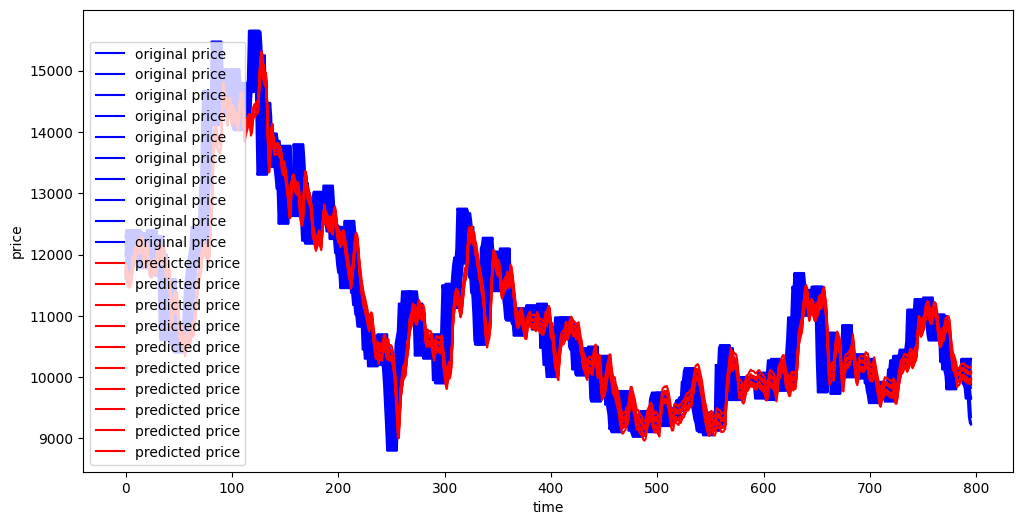

In [ ]:
#Plot y_predicted vs y_test

plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
